In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# np.random.seed(7007)  # for reproducibility

In [2]:
# Can create a linear stack of layers.
from keras.models import Sequential
# Basically the core layers of any neural network.
from keras.layers import Dense, Dropout, Activation, Flatten
# Specifically CNN layers.
from keras.layers import Conv2D, MaxPooling2D
# Useful utilities
from keras.utils import np_utils

In [3]:
"""
This example creates a sequential model with a single dense layer with 10 outputs. Note that we need 
to specify the input shape.
"""
m = Sequential([Dense(10, input_shape = (10,)), Activation('linear') ])

In [4]:
"""
We also need to compile a Keras model. This sets up importantparts like its optimizer, loss function, 
and the metrics by which we measure the model's success.
"""
m.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])

In [5]:
!pip install -q xlrd
!git clone https://github.com/Benendead/MNIST_Notebook/

Cloning into 'MNIST_Notebook'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


In [6]:
!ls MNIST_Notebook/

Abridged_Keras_and_CNNs.ipynb  fifty_epochs.h5	     README.md
dataset.zip		       Keras_and_CNNs.ipynb


In [7]:
# Open up the .zip file containing our dataset.
!unzip MNIST_Notebook/dataset.zip

Archive:  MNIST_Notebook/dataset.zip
   creating: dataset/
  inflating: dataset/test.csv        
   creating: __MACOSX/
   creating: __MACOSX/dataset/
  inflating: __MACOSX/dataset/._test.csv  
  inflating: dataset/train.csv       
  inflating: __MACOSX/dataset/._train.csv  


In [8]:
# There it is.
!ls dataset/

test.csv  train.csv


In [9]:
# This reads in the .csv files we've imported and uncompressed from Github.
# The test variable here is a pandas DataFrame.
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [10]:
# Previews the imported data. Right now every image is one row. 
# We need to fix that.
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# We now put the datasets into numpy arrays.
np_train = train.values
np_test = test.values

# Prints out the shape and type of the training set dataframe.
print(np_train.shape)
print(type(np_train))

(42000, 785)
<class 'numpy.ndarray'>


In [12]:
# These format the arrays so that the images are now grids instead of rows.
# We also extract the labels for the training data as Y_train.

X_train = np_train[:,1:]
X_train = np.reshape(X_train, (len(X_train), 28, 28))
Y_train = np_train[:,0]

print("Shape of np_test:", np_test.shape)
X_test = np.reshape(np_test, (len(np_test), 28, 28, 1)) # Change the dimensions because that's what our Keras model wants.
print("Shape of X_test:", X_test.shape)

Shape of np_test: (28000, 784)
Shape of X_test: (28000, 28, 28, 1)


In [13]:
print(X_train.shape)
# 42,000 training examples. Each one is a 28 by 28 grid.

(42000, 28, 28)


8 4
9 7


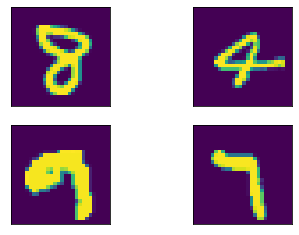

In [14]:
# Randomly plots four examples from the training data.
# Also prints their labels from the training data labels.
fig, axes = plt.subplots(nrows = 2, ncols = 2)
nums = []
for i in range(4):
    num = np.random.randint(0, len(X_train))
    nums.append(num)

# Removes ticks from all 4 subplots in one line.
plt.setp(axes, xticks = [], yticks = [])
    
k = 0
for i in range(2):
    for j in range(2):
        axes[i,j].imshow(X_train[nums[k]])
        k += 1

print(Y_train[nums[0]], Y_train[nums[1]])
print(Y_train[nums[2]], Y_train[nums[3]])

In [15]:
# This shows what the data actually looks like to the machine.
index = 1
print(Y_train[index])
pd.DataFrame(X_train[index])

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,18,30,137,137,192,86,72,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,13,86,250,254,254,254,254,217,246,151,32,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,16,179,254,254,254,254,254,254,254,254,254,231,54,15,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,72,254,254,254,254,254,254,254,254,254,254,254,254,104,0,0,0,0,0,0,0
8,0,0,0,0,0,0,61,191,254,254,254,254,254,109,83,199,254,254,254,254,243,85,0,0,0,0,0,0
9,0,0,0,0,0,0,172,254,254,254,202,147,147,45,0,11,29,200,254,254,254,171,0,0,0,0,0,0


In [16]:
# We need to format the data into the description:
#              n, depth, width, height.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(42000, 28, 28, 1)


In [17]:
# It's also wise to standardize the data type as float32.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
# Finally, we should normalize the data to the range [0,1]. It started 0 to 255, so this should do the trick.
X_train /= 255
X_test /= 255

In [19]:
# We want a separate vector for each possible label. Right now we have a bunch of actual labels.
# That's no good.
print(Y_train.shape)
print(Y_train[:10]) # Peeps the first 10 elements of Y-train.

(42000,)
[1 0 1 4 0 0 7 3 5 3]


In [20]:
# Turns each possible label into a binary vector. Look up "one hot encoding" for more info
Y_train = np_utils.to_categorical(Y_train, 10)

In [21]:
# This is better.
print(Y_train.shape)
print(Y_train[:10]) # Now each label is a vector of the ten possible options.

(42000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [22]:
# Moving right along, let's establish our model.
model = Sequential()

# We also add the first layer, the input layer.
model.add(Conv2D(32, (3, 3), strides = (1, 1), 
                 activation = "relu", input_shape = (28, 28, 1)))

In [23]:
# Allows us to check the shape of the output of our model.
print(model.output_shape)

(None, 26, 26, 32)


In [24]:
model.add(Conv2D(32, (3, 3), activation = 'relu')) # The first hidden layer.
model.add(MaxPooling2D(pool_size = (2, 2))) # The first pooling layer. 
model.add(Dropout(0.25)) # First dropout layer.
print(model.output_shape) # Then check our output's shape.

(None, 12, 12, 32)


In [25]:
model.add(Conv2D(32, (3, 3), activation = 'relu')) # The first hidden layer.
model.add(MaxPooling2D(pool_size = (2, 2))) # The first pooling layer. 
model.add(Dropout(0.25)) # First dropout layer.
print(model.output_shape) # Then check our output's shape.

(None, 5, 5, 32)


In [26]:
# The Flatten layer merges all filters together.
model.add(Flatten())
print(model.output_shape)
print(11*11*16)

(None, 800)
1936


In [27]:
# We add a fully connected layer, dropout one last time, and then have our final layer.
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "sigmoid"))

In [28]:
# Once we have all our layers, we can compile the model.
# The metrics argument allows us to specify different metrics for different outputs.
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [29]:
# Trains the model for a given number of epochs. Takes about a minute and a half if we're on Colab's GPU. Any questions?
model.fit(X_train, Y_train, 
          batch_size = 32, epochs = 5, verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3550 - accuracy: 0.8930
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1188 - accuracy: 0.9650
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0863 - accuracy: 0.9747
Epoch 4/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0723 - accuracy: 0.9787
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0632 - accuracy: 0.9800


In [29]:
# This evaluates the model on the training data. 
# We have no test data from Kaggle, so this is the next best thing.
score = model.evaluate(X_train, Y_train, verbose = 1)

In [31]:
# This evaluates the model on the training data. 
# We have no test data from Kaggle, so this is the next best thing.
score = model.evaluate(X_train, Y_train, verbose = 1)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0199 - accuracy: 0.9934


In [32]:
# These are the loss and accuracy values. Ask someone who knows what they're doing what that means.
score

[0.019907210022211075, 0.9934285879135132]

In [33]:
# Creates a numpy array of our algorithm's predictions on the test dataset.
predictions = model.predict_classes(X_test, verbose = 1)
print(predictions.shape)
print(type(predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
875/875 [==============================] - 1s 1ms/step
(28000,)
<class 'numpy.ndarray'>


In [34]:
# And then this exports our predictions to a csv file.
# Note that the submission suggestion was 1-indexed. Ugh.
df = pd.DataFrame({"ImageId" : range(1,len(predictions) + 1),
                   "Label" : predictions})
df.to_csv("predictions.csv", index = False)

# We could then submit that .csv to the Kaggle competition.

In [35]:
import h5py # Just in case.

def saveModel(model, fileName):
    """
    Saves a given Keras model into a .h5 file.
    
    Parameters
    ----------
    model : Keras model
        The model to be saved.
    fileName : String
        The main name of the files.
    """
    # Save model to HDF5
    h5_string = fileName + ".h5"
    model.save(h5_string)
    print("Saved model to disk")
    
saveModel(model, "model_one")

Saved model to disk


In [36]:
def loadModel(filePath):
    """
    Loads a given Keras model from a filepath.
    
    Parameters
    ----------
    filePath : String
        The path to the file.
    """
    loaded_model = keras.models.load_model(filePath)
    print("Loaded model from disk")
    return loaded_model

In [37]:
!ls MNIST_Notebook/

Abridged_Keras_and_CNNs.ipynb  fifty_epochs.h5	     README.md
dataset.zip		       Keras_and_CNNs.ipynb


In [38]:
# Let's load in a pre-trained model from my Github.
new_model = loadModel("MNIST_Notebook/fifty_epochs.h5")

Loaded model from disk


In [39]:
new_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [41]:
new_model.fit(X_train, Y_train, 
              batch_size = 32, epochs = 20, verbose = 1)

Epoch 1/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0165 - accuracy: 0.9955
Epoch 2/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0166 - accuracy: 0.9948
Epoch 3/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 4/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0185 - accuracy: 0.9949
Epoch 5/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 6/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0159 - accuracy: 0.9950
Epoch 7/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0153 - accuracy: 0.9956
Epoch 8/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0178 - accuracy: 0.9948
Epoch 9/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0148 - accuracy: 0.9955
Epoch 10/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.016

In [42]:
score = new_model.evaluate(X_train, Y_train, verbose = 1)
score

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0010 - accuracy: 0.9998


[0.001038484973832965, 0.9998095035552979]

In [43]:
saveModel(new_model, "fiftyone_epochs")

Saved model to disk


In [44]:
# Let's see if a new file is there.
!ls

dataset		    __MACOSX	    model_one.h5     sample_data
fiftyone_epochs.h5  MNIST_Notebook  predictions.csv


In [46]:
from google.colab import files
files.download("fiftyone_epochs.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# This creates the .csv of our new preditions.

predictions = new_model.predict_classes(X_test, verbose = 1)
df = pd.DataFrame({"ImageId" : range(1,len(predictions) + 1),
                   "Label" : predictions})
df.to_csv("51_epochs.csv", index = False)

875/875 [==============================] - 1s 1ms/step
